In [ ]:
# Temperature Forecast Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [13]:
weather_df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")

In [14]:
weather_df.head()


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [15]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [16]:
weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


In [17]:
weather_df.shape

(7752, 25)

In [ ]:
# Data Analysis and Visualization

<Axes: >

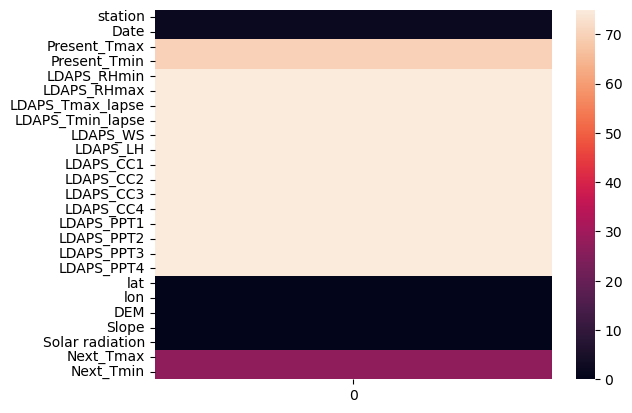

In [19]:
sns.heatmap(weather_df.isnull().sum().to_frame())

In [20]:
weather_df.index

RangeIndex(start=0, stop=7752, step=1)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

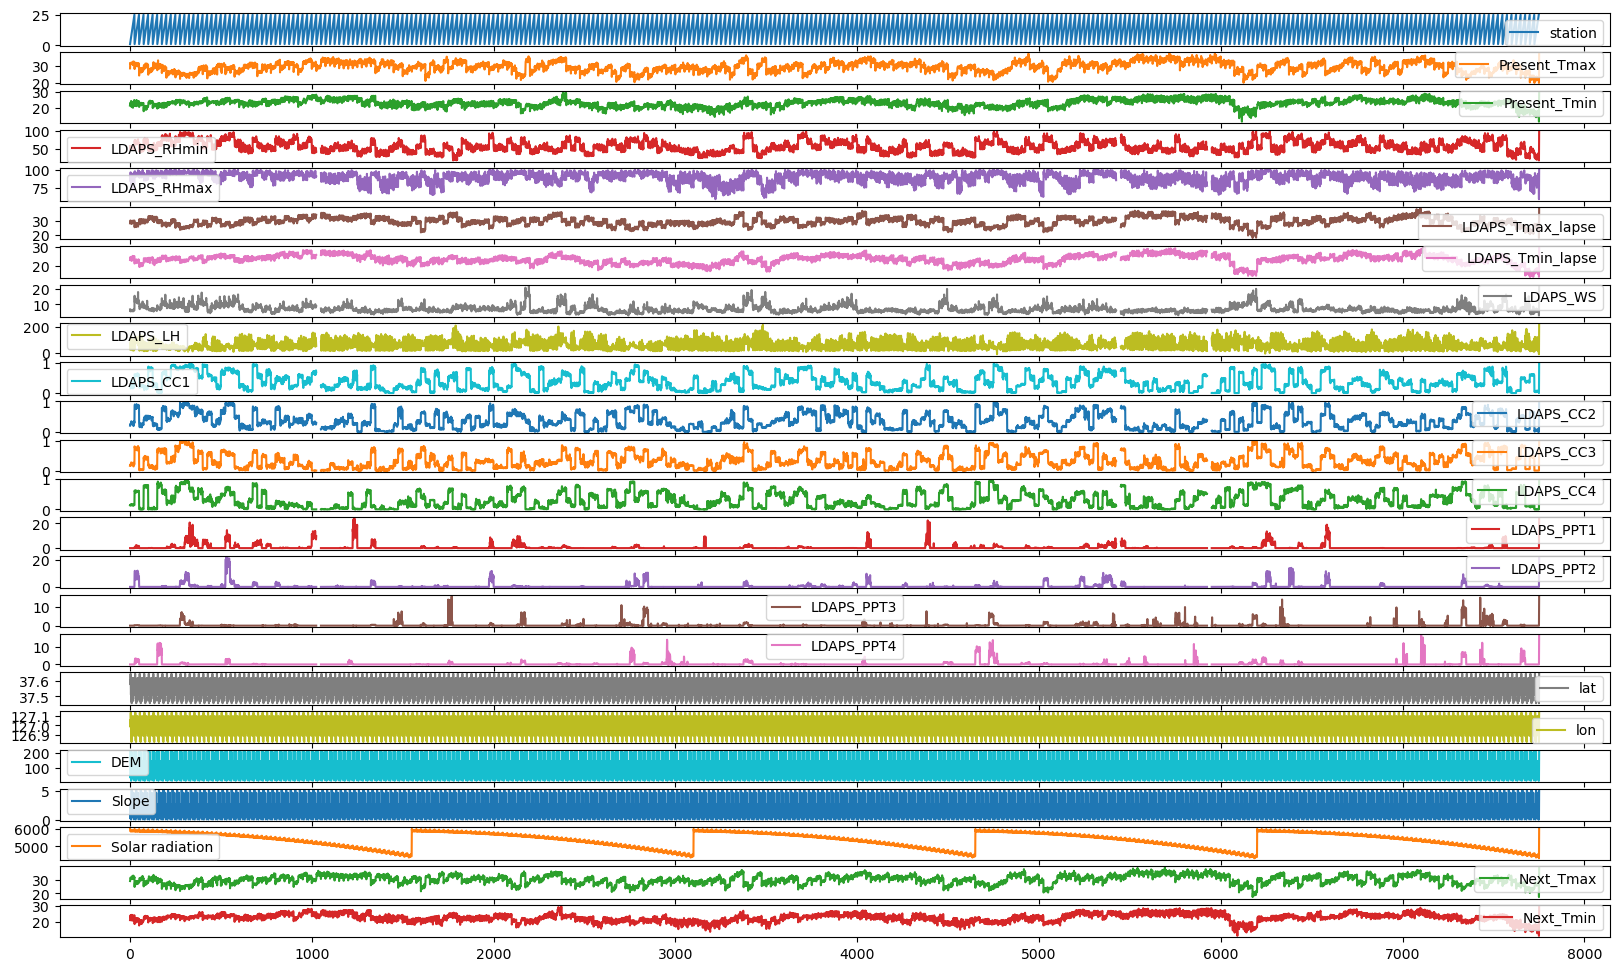

In [25]:
weather_df.plot(subplots=True, figsize=(20,12))


In [9]:
print(weather_df.loc[weather_df["T_mu"]==weather_df["T_mu"].max()])
print(weather_df.loc[weather_df["T_mu"]==weather_df["T_mu"].min()])

NameError: name 'weather_df' is not defined